<a href="https://colab.research.google.com/github/abhiraj-mengade/Guessing_Randomness/blob/main/Guessing_Randomness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Content:**
---
*This notebook is about a small attempt at simulating a general human like response to the classic 'Head or Tails?' Guess.*


---



Through Test cases we will improve upon previous method of 
guessing. The method in each test case is similar, we genearate two arrays of values. One which contains randomly generated 100 values of Head/Tails the other one contains our predicted values. Latstly, we will compare these two using some graphical methods.

---


**Definitions**


---
*  P => Probability of getting heads 
*  Heads => 1; Tails => 0
*  e => Learning Rate

*Following are the 3 tests that follow.*

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

**Test 1:**


---


*A simple test with P = 0.5.*


---


 An ideal version of guess.


Accuraccy = 0.54


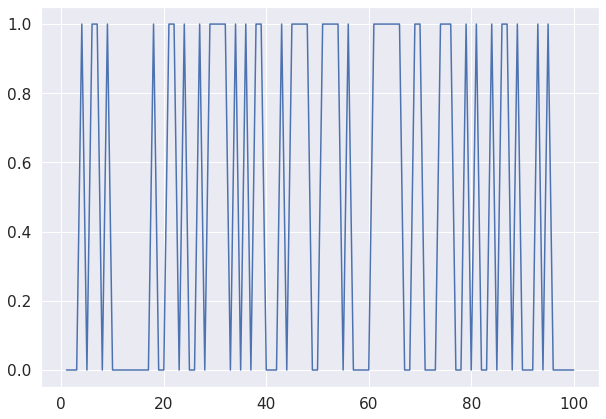

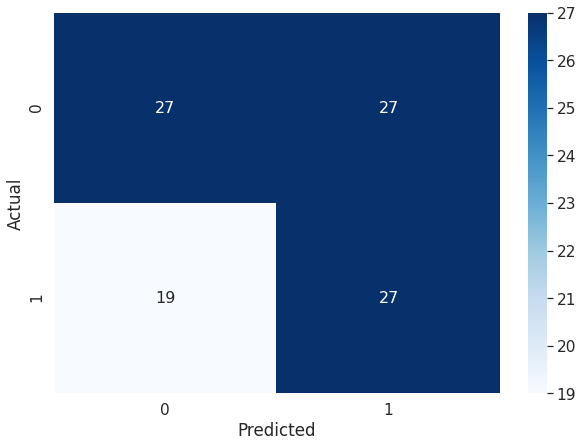

In [ ]:
P = 0.5
Control = np.random.randint(low=0, high=2, size=100)
Test = [np.random.choice((1,0), p=[P, 1-P]) for x in range(100)]
Acc = np.count_nonzero(abs(Control-Test) == 0)/100
print(f"Accuraccy = {Acc}")
plt.figure(figsize = (10,7))
plt.plot(range(1,101), abs(Test-Control))
#Confusion Matrix:
data = confusion_matrix(Control, Test)
df_cm = pd.DataFrame(data, columns=np.unique(Control), index = np.unique(Control))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) #for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

**Test 2:**


---


*A bit improvisation of earlier test with a dynamic value of P*

According to the Control results the probabilty of returning Head/Tails will differ. The previous truth value will affect the next predicted value.
If the previous value of control is Tails then P will be updated as:

***P = (1+e)P***

else

 ***P = (1-e)P***

 (where e is the learning rate)

---


 

Accuraccy = 0.5


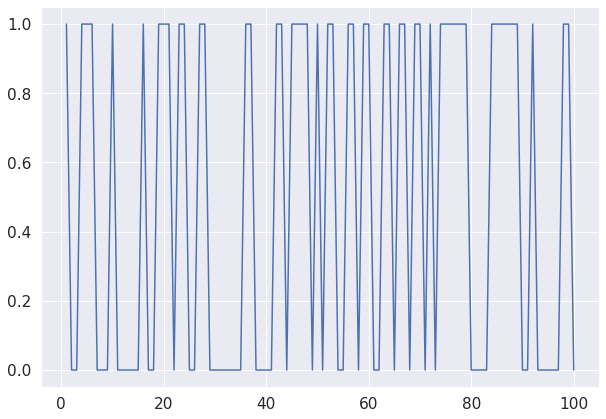

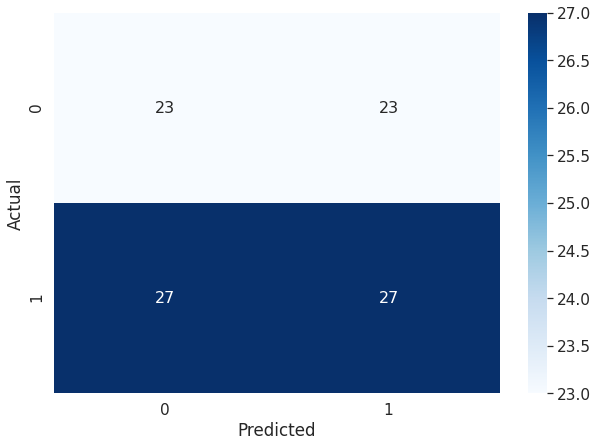

In [ ]:
P = 0.5
Test=[]
e=0.5/10
Control = np.random.randint(low=0, high=2, size=100)
for x in range(100):
  Test.append(np.random.choice((1,0), p=[P, 1-P]))
  if (Control[x]==1):
   P = min(P+e*P, 1)
  else: P = max(P-e*P, 0)

Acc = np.count_nonzero(abs(Control-Test) == 0)/100
print(f"Accuraccy = {Acc}")
plt.figure(figsize = (10,7))
plt.plot(range(1,101), abs(Test-Control))
#Confusion Matrix:
data = confusion_matrix(Control, Test)
df_cm = pd.DataFrame(data, columns=np.unique(Control), index = np.unique(Control))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) #for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})



